<a href="https://colab.research.google.com/github/Zihan-Hei/NYC_Housing_Aanlysis/blob/main/Alexandra_Chigrinuk%2C_Michelle_Augeri%2C_Zihan_Hei%2C_Shawn_Redhead%2C_Emily_Maldonado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 	Alexandra Chigrinuk, Michelle Augeri, Zihan Hei, Shawn Redhead, Emily Maldonado

# 1. Introduction

We are local real estate agents looking for low cost housing for families. Our overall goal is to find affordable housing for families, particularly small, low-income families. We hope to look at all neighborhoods and cities and determine where our clients could move to at an affordable price. The dataset has columns such as price, city, amenities, and bedrooms/bathrooms just to name a few; by analyzing this data, we as real estate agents can find low cost housing for families that has everything they are looking for.

This dataset was gathered by Yash Patel, and donated to the UCI Repository on 12/25/2019. The data was collected from multiple online classified listings, scraping the data and taking note of common real estate attributes, and structured to accomodate for machine learning excersizes. It contains 22 attributes, such as rental price, square footage, number of bathrooms and bedrooms, amenities, location details (latitude, longitude, city, state), and other descriptive data like title and category. The UCI Machine Learning Repository is a publicly available resource that houses many datasets such as this one, for the empirical analysis of machine learning algorithms.

We will analyze our data through these questions:

1) How accurately can we determine price from square footage, is there a significant correlation? This would involve performing a linear regression, as we would like to confirm whether we can make fair assumptions about the cost of an apartment, looking at square footage and holding other factors constant. This would make apartment cost estimates easier for our clients and would also help us give them a reality-check regarding how much space they can realistically afford.

2) Can we accurately classify rental properties as “affordable” or “unaffordable” for low-income households in NYC based on a set price $1100 threshold and property attributes? This would involve classification such as logistic regression, by creating a model that effectively distinguishes between "affordable" and "unaffordable" properties. This would help us identify the right options for our clients within their budget constraints.

3) How many apartments in a specific city (nyc) have at least 2 bedrooms and 1 bath for less than $1500 per month? This would involve making a graph, moat likely a count graph, to see the total amount of apartments that meet this criteria. Having this information would help our clients narrow down their search for affordable housing in NYC that has some space.

4) Is there easy access to "affordable" housing in NYC? What neighborhoods/where should we direct new homeowners to? This would involve mapping the apartment locations onto a map of NYC to see the spatial relations of the apartments we deem "affordable" and "unaffordable" to see where cheaper and more expensive apartments tend to be located. This would help us to pick apartments to market to our target audience or even to find neighborhoods that we could hone in on for advertising.

5) Can it be determined if prices are affected by owning pets? How much of an effect does owning a pet have on affordable housing? This would involve logistic regression by creating a model where we can examine the variables by using the p-value and the coefficent. If the coefficent is positive then that means that owning a pet increases the price of the apartment. If its negative, then that means owning a pet decrease the price of the apartment. Having this information on hand would help our clients with pets find housing at an affordable price.

# 2. Dataset

Link to dataset(s): https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified



 **Numeric:**

bathrooms = number of bathrooms

bedrooms = number of bedrooms

price = rental price of apartment

square_feet = size of the apartment

latitude = where the apartment is located

longitude = where the apartment is located


---

 **Text:**


amenities = like AC, basketball,cable, gym, internet access, pool, refrigerator etc.

cityname =  where the apartment is located

state =  where the apartment is located

source = origin of classified



---


**Categorical:**

pets_allowed = what pets are allowed dogs/cats etc.


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import geopandas as gpd

In [ ]:
apartments10k = pd.read_csv ("/content/apartments_for_rent_classified_10K.csv", encoding="latin1", sep=";")
apartments10k.head(1)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415


In [ ]:
dead_columns = ["id", "category", "title", "body", "price_type", "price_display", "currency", "fee", "has_photo", "address", "time"]
apartments_clean = apartments10k.drop(columns = dead_columns)
apartments_clean.head(10)

,amenities,bathrooms,bedrooms,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source
0,NaN,NaN,0.0,NaN,790,101,Washington,DC,38.9057,-76.9861,RentLingo
1,NaN,NaN,1.0,NaN,425,106,Evansville,IN,37.9680,-87.6621,RentLingo
2,NaN,1.0,0.0,NaN,1390,107,Arlington,VA,38.8910,-77.0816,RentLingo
3,NaN,1.0,0.0,NaN,925,116,Seattle,WA,47.6160,-122.3275,RentLingo
4,NaN,NaN,0.0,NaN,880,125,Arlington,VA,38.8738,-77.1055,RentLingo
5,"Dishwasher,Elevator,Patio/Deck,Pool,Storage",1.0,0.0,NaN,2475,130,Manhattan,NY,40.7629,-73.9885,Listanza
6,NaN,NaN,0.0,NaN,1800,132,Venice,CA,33.9932,-118.4609,RentLingo
7,NaN,NaN,0.0,NaN,840,136,Washington,DC,38.9328,-77.0297,RentLingo
8,Refrigerator,1.0,0.0,NaN,1495,138,San Francisco,CA,37.7599,-122.4379,RentLingo
9,NaN,NaN,0.0,NaN,890,141,Washington,DC,38.9118,-77.0132,RentLingo


In [ ]:
# dead_columns:

# id is useless
# category only has 3 different types, and 9996 of 10000 are the same category
# title has multiple different data types, i.e., some are ratings and some are descriptions, and some are just locations. We cant do much with this
# body is just descriptions of each house, we cant do much with them
# price_type has the same issue as category, 9998 of 10000 are the same category, so there is very few outliers, not much we can look for
# currency are all USD
# all of the fee are No fee
# has_photo has thumbnail, yes, and no. Thumbnail is the vast majority of the entries, and doesnt really tell us anything
# price_display is just the price with a dollar sign, it is redundant and we cant use it for anything
# address is useless because we already have the latitude and longitude to visually show house locations with geopandas
# time is just useless

# 2.1 Question 1

Question 1: How accurately can we determine price from square footage, is there a significant correlation?

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
#removes missing data from price and square foot columns to prepare for regression
apartments_clean = apartments_clean.dropna(subset=['price', 'square_feet'])

In [ ]:
#identifies dependent variable as price because it is dependent on the independent variable, square feet
#X and y allows us to formulate model to predict price based on square feet
X = apartments_clean[["square_feet"]]
y = apartments_clean["price"]

In [ ]:
#creates our linear regression model
X = sm.tools.tools.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     1802.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:44:39   Log-Likelihood:                -83175.
No. Observations:               10000   AIC:                         1.664e+05
Df Residuals:                    9998   BIC:                         1.664e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         879.5390     17.393     50.569      

- The model shows, for every additional square foot, the price of an apartment increases by approximately $0.64. This coefficient is statistically significant with a p-value of 0.000, confirming that there is a meaningful relationship between square footage and price.
- Approximately 15.3% of the variation in price can be explained by  square feet, which is a relatively low r-squared value, showing that while square footage is statistically significant, according to a p value of 0.000, it does not explain a large portion of the variability in price. So, **other factors have an influence on price besides just square footage, making it unrealistic to soley rely on sq ft as an indicator for price. **

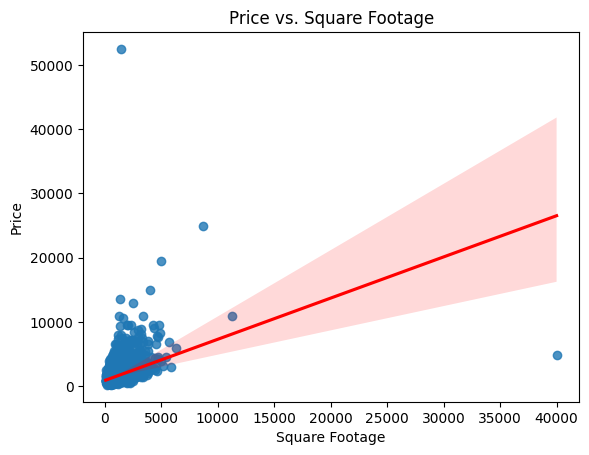

In [ ]:
sns.regplot(x='square_feet', y='price', data=apartments_clean, line_kws={"color": "red"})
plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

- While the regression line captures the general trend of increasing price with larger square footage, the dispersion of points indicates that other factors are likely affecting price. Additionally, the tight clustering at smaller square footage suggests that square footage may be a better predictor for smaller properties than larger ones.

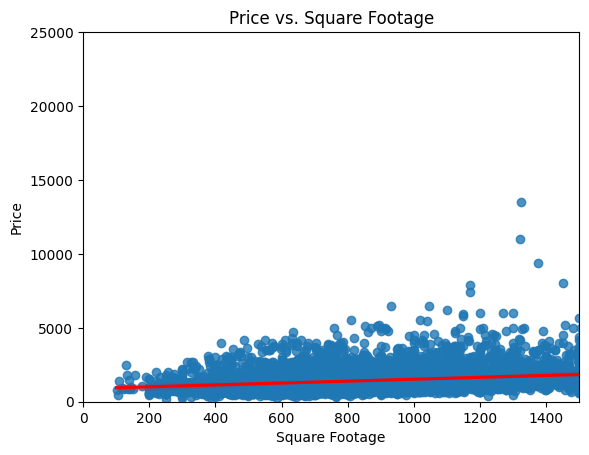

In [ ]:
sns.regplot(x='square_feet', y='price', data=apartments_clean, line_kws={"color": "red"})
plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.xlim(0, 1500)
plt.ylim(0, 25000)
plt.show()

- A closer loook into the graph shows that the data points are close to the regression line, indicating that our line is a good predictor for price when we consider lower square feet, keeping every other factor constant, also certifying that other factors have influence on the price, as price is roughly the same for large varying square feet.

Determining whether bathrooms or bedrooms would be a better indicator of price...

In [ ]:
apartments_clean = apartments_clean.dropna(subset=['price', 'amenities', 'bathrooms', 'bedrooms', 'pets_allowed',
       'square_feet', 'cityname', 'state', 'latitude', 'longitude', 'source'])

In [ ]:
X = apartments_clean[["bathrooms", "bedrooms"]]
y = apartments_clean["price"]

In [ ]:
#creates our linear regression model
X = sm.tools.tools.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     263.4
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          9.00e-108
Time:                        19:44:51   Log-Likelihood:                -30162.
No. Observations:                3754   AIC:                         6.033e+04
Df Residuals:                    3751   BIC:                         6.035e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        656.4997     33.660     19.504      0.0

The analysis reveals a statistically significant relationship between square footage and apartment price, with each additional square foot contributing approximately $0.64 to the price. The p-value of 0.000 confirms the strength of this relationship, though the R-squared value of 15.3% indicates that square footage explains only a small portion of the variability in price, highlighting the influence of other factors such as location, amenities, and condition. Visual inspection of the regression plot shows a general trend of increasing price with square footage, but the clustering of points and presence of outliers suggest moderate variability, with some extreme prices driven by factors beyond size. Narrowing the range of square footage and price improves the fit of the regression line, underscoring its relevance within specific ranges. While square footage serves as a useful predictor, it is insufficient on its own to accurately determine price, emphasizing the need for a more comprehensive model that incorporates additional variables to explain price variability more effectively.

The second model works to determine whether bedrooms or bathrooms are better indicators of price, seeing as square footage was not. The coefficient for bathrooms is
551.24, indicating that each additional bathroom is associated with an increase in price by approximately $551. This effect is statistically significant, as evidenced by the p-value of 0.000. Conversely, the coefficient for bedrooms is −1.06, suggesting a negligible and statistically insignificant effect on price. However the R-squared of this model is even lower at 12.3% indicating that square footage is a more reliable indicator.

# 2.2 Question 2



---



Question 2: Can we accurately classify rental properties as “affordable” or “unaffordable” for low-income households based on a set price threshold and property attributes?

The article form [National League Of Citites](https://www.nlc.org/article/2024/01/08/what-is-affordable-housing/) reported that the U.S. Department of Housing and Urban Development defines “affordable housing” as housing on which the occupant is paying no more than 30 percent of gross income for housing costs, including utilities. Keeping housing costs below 30 percent of income is intended to ensure that households have enough money to pay for other nondiscretionary costs; therefore, policymakers consider households who spend more than 30 percent of income on housing costs to be housing cost burdened.

According to [NYC.gov](https://www.nyc.gov/site/hpd/services-and-information/area-median-income.page), the affordable monthly rent for a 30% AMI unit in 2024 is 815 dollars for a studio, 873 dollars for a one-bedroom, 1,048 dollars for a two-bedroom, and 1,211 dollars for a three-bedroom.

So in our dataset, we're going to consider $1100 as "affordable" price for low-income households.


In [ ]:
# Basic working with data libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scikit-learn machine learning imports
import statsmodels.api as sm

from sklearn.tree import *
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
apartments_clean["affordable"]=apartments_clean["price"] <= 1100
apartments_ny = apartments_clean[apartments_clean['state'] == "NY"]
apartments_ny

,amenities,bathrooms,bedrooms,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,affordable
751,"Clubhouse,Dishwasher,Elevator,Patio/Deck,Refri...",1.0,1.0,"Cats,Dogs",1040,468,Rochester,NY,43.1689,-77.6289,RentLingo,True
1178,"Cable or Satellite,Dishwasher,Parking,Patio/De...",1.0,1.0,"Cats,Dogs",915,525,Buffalo,NY,42.9112,-78.8171,RentLingo,True
3254,"Cable or Satellite,Clubhouse,Dishwasher,Intern...",1.0,2.0,"Cats,Dogs",1598,696,Brockport,NY,43.2129,-77.9260,RentLingo,False
3654,"Cable or Satellite,Dishwasher,Garbage Disposal...",1.0,1.0,"Cats,Dogs",1099,716,Rochester,NY,43.1689,-77.6289,RentLingo,True
3661,"Dishwasher,Elevator,Parking,Refrigerator",1.0,1.0,"Cats,Dogs",2300,717,Yonkers,NY,40.9392,-73.8727,RentLingo,False
3853,"Cable or Satellite,Elevator,Parking,Refrigerat...",1.0,1.0,"Cats,Dogs",795,727,Buffalo,NY,42.9112,-78.8171,RentLingo,True
3906,Dishwasher,1.0,1.0,"Cats,Dogs",2264,732,Port Chester,NY,41.0155,-73.6756,RentLingo,False
4308,"Cable or Satellite,Dishwasher,Elevator,Interne...",1.0,1.0,"Cats,Dogs",2600,755,Yonkers,NY,40.9392,-73.8727,RentLingo,False
4638,"Dishwasher,Pool",1.0,1.0,"Cats,Dogs",2220,783,New Rochelle,NY,40.9180,-73.7837,RentLingo,False
4910,"Cable or Satellite,Dishwasher,Parking,Refriger...",1.0,2.0,"Cats,Dogs",1025,800,Buffalo,NY,42.9112,-78.8171,RentLingo,True


In [ ]:
apartments_ny.isnull().values.any()

False

In [ ]:
apartments_ny=apartments_ny.dropna()
apartments_ny

,amenities,bathrooms,bedrooms,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,affordable
751,"Clubhouse,Dishwasher,Elevator,Patio/Deck,Refri...",1.0,1.0,"Cats,Dogs",1040,468,Rochester,NY,43.1689,-77.6289,RentLingo,True
1178,"Cable or Satellite,Dishwasher,Parking,Patio/De...",1.0,1.0,"Cats,Dogs",915,525,Buffalo,NY,42.9112,-78.8171,RentLingo,True
3254,"Cable or Satellite,Clubhouse,Dishwasher,Intern...",1.0,2.0,"Cats,Dogs",1598,696,Brockport,NY,43.2129,-77.9260,RentLingo,False
3654,"Cable or Satellite,Dishwasher,Garbage Disposal...",1.0,1.0,"Cats,Dogs",1099,716,Rochester,NY,43.1689,-77.6289,RentLingo,True
3661,"Dishwasher,Elevator,Parking,Refrigerator",1.0,1.0,"Cats,Dogs",2300,717,Yonkers,NY,40.9392,-73.8727,RentLingo,False
3853,"Cable or Satellite,Elevator,Parking,Refrigerat...",1.0,1.0,"Cats,Dogs",795,727,Buffalo,NY,42.9112,-78.8171,RentLingo,True
3906,Dishwasher,1.0,1.0,"Cats,Dogs",2264,732,Port Chester,NY,41.0155,-73.6756,RentLingo,False
4308,"Cable or Satellite,Dishwasher,Elevator,Interne...",1.0,1.0,"Cats,Dogs",2600,755,Yonkers,NY,40.9392,-73.8727,RentLingo,False
4638,"Dishwasher,Pool",1.0,1.0,"Cats,Dogs",2220,783,New Rochelle,NY,40.9180,-73.7837,RentLingo,False
4910,"Cable or Satellite,Dishwasher,Parking,Refriger...",1.0,2.0,"Cats,Dogs",1025,800,Buffalo,NY,42.9112,-78.8171,RentLingo,True


In [ ]:
apartments_ny.columns

Index(['amenities', 'bathrooms', 'bedrooms', 'pets_allowed', 'price',
       'square_feet', 'cityname', 'state', 'latitude', 'longitude', 'source',
       'affordable'],
      dtype='object')

In [ ]:
X = apartments_ny[['amenities', 'bathrooms', 'bedrooms', 'pets_allowed', 'price', 'square_feet', 'cityname', 'state', 'latitude', 'longitude', 'source', 'affordable']]
X = pd.get_dummies(X,drop_first=True)
X

,bathrooms,bedrooms,price,square_feet,latitude,longitude,affordable,"amenities_Cable or Satellite,Clubhouse,Dishwasher,Internet Access,Parking,Refrigerator","amenities_Cable or Satellite,Dishwasher,Elevator,Gated,Internet Access,Parking,Patio/Deck,Refrigerator","amenities_Cable or Satellite,Dishwasher,Elevator,Internet Access,Parking,Patio/Deck,Pool,Refrigerator,View",...,cityname_Liverpool,cityname_New Rochelle,cityname_North Tonawanda,cityname_Port Chester,cityname_Rochester,cityname_Sleepy Hollow,cityname_Tarrytown,cityname_White Plains,cityname_Yonkers,source_RentLingo
751,1.0,1.0,1040,468,43.1689,-77.6289,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1178,1.0,1.0,915,525,42.9112,-78.8171,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3254,1.0,2.0,1598,696,43.2129,-77.9260,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3654,1.0,1.0,1099,716,43.1689,-77.6289,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3661,1.0,1.0,2300,717,40.9392,-73.8727,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3853,1.0,1.0,795,727,42.9112,-78.8171,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3906,1.0,1.0,2264,732,41.0155,-73.6756,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4308,1.0,1.0,2600,755,40.9392,-73.8727,False,False,False,True,...,False,False,False,False,False,False,False,False,True,True
4638,1.0,1.0,2220,783,40.9180,-73.7837,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4910,1.0,2.0,1025,800,42.9112,-78.8171,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
X = X.drop("affordable", axis=1)
y = apartments_ny['affordable'].astype("str")
y

,affordable
751,True
1178,True
3254,False
3654,True
3661,False
3853,True
3906,False
4308,False
4638,False
4910,True


In [ ]:
X.columns

Index(['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude',
       'longitude',
       'amenities_Cable or Satellite,Clubhouse,Dishwasher,Internet Access,Parking,Refrigerator',
       'amenities_Cable or Satellite,Dishwasher,Elevator,Gated,Internet Access,Parking,Patio/Deck,Refrigerator',
       'amenities_Cable or Satellite,Dishwasher,Elevator,Internet Access,Parking,Patio/Deck,Pool,Refrigerator,View',
       'amenities_Cable or Satellite,Dishwasher,Elevator,Internet Access,Refrigerator,Storage',
       'amenities_Cable or Satellite,Dishwasher,Garbage Disposal,Internet Access,Parking,Patio/Deck,Refrigerator,Storage',
       'amenities_Cable or Satellite,Dishwasher,Garbage Disposal,Internet Access,Parking,Pool,Refrigerator,Storage,Tennis',
       'amenities_Cable or Satellite,Dishwasher,Internet Access,Patio/Deck,Pool,Refrigerator',
       'amenities_Cable or Satellite,Dishwasher,Parking,Patio/Deck,Refrigerator',
       'amenities_Cable or Satellite,Dishwasher,Parking,Refrigera

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=314159)

In [ ]:
model = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
feature_names = X.columns.tolist()

In [ ]:
importances = model.feature_importances_
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Gini Importance': importances
})
feature_imp_df = feature_imp_df.sort_values('Gini Importance', ascending=False)
print(feature_imp_df)

                                              Feature  Gini Importance
2                                               price         0.261435
5                                           longitude         0.201646
4                                            latitude         0.128235
3                                         square_feet         0.091441
24                                   cityname_Buffalo         0.057007
31                                 cityname_Rochester         0.039267
1                                            bedrooms         0.038697
36                                   source_RentLingo         0.025102
25                                cityname_Gouverneur         0.021550
19                               amenities_Dishwasher         0.020757
28                              cityname_New Rochelle         0.017931
27                                 cityname_Liverpool         0.015540
12  amenities_Cable or Satellite,Dishwasher,Intern...         0.012569
6   am

Based on the Random Forest model, the feature price has the highest Gini importance (0.256015), indicating that it plays a significant role in the model's ability to classify properties as "affordable" or "unaffordable". Since price is directly tied to affordability, it makes sense that it would be the most influential factor in determining whether a property is considered "affordable" or not.

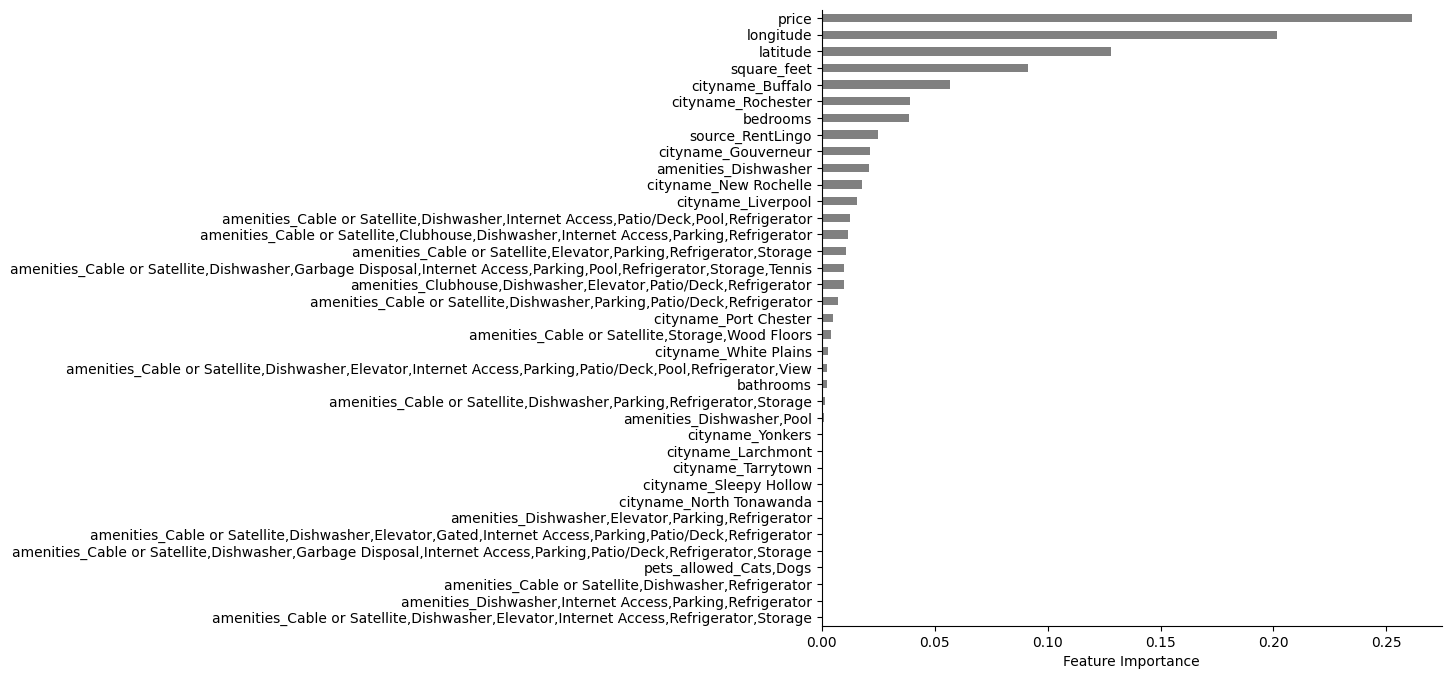

In [ ]:
forest_importances = pd.Series(model.feature_importances_,index=feature_names)
forest_importances.sort_values(inplace=True, ascending=True)

fig, ax = plt.subplots(figsize=(8, 8))
forest_importances.plot.barh(ax=ax, color='grey')
ax.set_xlabel("Feature Importance")

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom') # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


In [ ]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

print(f"Train Accuracy: {accuracy_score(yhat_train, y_train):.2f}")
print(f"Test Accuracy:  {accuracy_score(yhat_test, y_test):.2f}")
print(f"Null Accuracy:  {y_test.value_counts(normalize=True).iloc[0]:.2f}")

Train Accuracy: 1.00
Test Accuracy:  0.83
Null Accuracy:  0.83




*   The model perfectly classified all training data, which suggests it learned the relationships in the dataset without errors.

*   The model also perfectly classified the unseen test data, indicating strong generalization and no visible overfitting.


*   Since the null accuracy is 83%, the dataset is somewhat imbalanced, but the model still achieved far better accuracy by correctly distinguishing affordable and unaffordable properties.



In [ ]:
X = apartments_ny[['amenities', 'bathrooms', 'bedrooms', 'pets_allowed', 'price', 'square_feet', 'cityname', 'state', 'latitude', 'longitude', 'source', 'affordable']]
X = pd.get_dummies(X,drop_first=True)

y = apartments_ny['affordable']
feature_names = X.columns.tolist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=314159)

In [ ]:
model = RandomForestRegressor().fit(X_train, y_train)

In [ ]:
predictions = model.predict(X)

In [ ]:
mse = mean_squared_error(y, predictions)
r2 = r2_score(y,predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.00128695652173913
R-squared: 0.9945968253968254



*   The mean squared error 0.00176 shows that the model’s predictions closely match the actual affordability labels.
*   R-squared 0.9926 shows that approximately 99% of the variance in the affordability classification is explained by the model's features.


*   But perfect accuracy can sometimes indicate overfitting, and since affordability classes are somehow imbalanced, so we can evaluate a confusion matrix to confirm robustness.



In [ ]:
confusion = model.pred_table(threshold=0.5)

confusion.trace()/confusion.sum()*100

AttributeError: 'RandomForestRegressor' object has no attribute 'pred_table'

* This model's accuracy is 100%, the null accuracy is 83% for 0.0 (i.e. True(affordable)). Since model's accuracy is much higher than the null accuracy, it suggests that our model is much better for making useful predictions.

In [ ]:
y.value_counts(normalize=True)

,proportion
affordable,
False,0.608696
True,0.391304


In [ ]:
model.pred_table(threshold=0.5)

AttributeError: 'RandomForestRegressor' object has no attribute 'pred_table'

This has made a confusion matrix, reading left to right:

* True positive: instances where the model correctly predicted affordable.

* False positive: instances were the model innacurately predicted affordable.

* False negative: model predicted affordable, but there was unaffordable.

* True negative: model prediced affordable, and there was affordable.

This suggests that the model is highly accurate on test data. However, perfect metrics can sometimes indicate overfitting, this is because I initially filtered out data from other states and only kept data from New York, making the sample smaller and potentially leading to overfitting.

# 2.3. Question 3

Question 3: How many apartments in a specific city (nyc) have at least 2 bedrooms and 1 bath for less than $1500 per month?

In [ ]:
apartments_clean["bedbath_"] = ((apartments_clean["bedrooms"] >= 2) &(apartments_clean["bathrooms"] >= 1) &(apartments_clean["price"] < 1500))
apartments_clean["bedbath_"].value_counts()

,count
bedbath_,
False,2581
True,1173


In [ ]:
apartments_clean["nyc"] = ((apartments_clean["cityname"] == "Manhattan") |(apartments_clean["cityname"] == "Brooklyn") |(apartments_clean["cityname"] == "New York"))
apartments_clean["nyc"].value_counts()

,count
nyc,
False,3750
True,4


Only Manhattan and Brooklyn had apartments in this dataset, and so did "New York" so I included that as NYC so there would be a bigger sample

Used the or indicator becuase if i used the and indicator made the whole column false so to include all the nyc apartment as true, used the or indicator

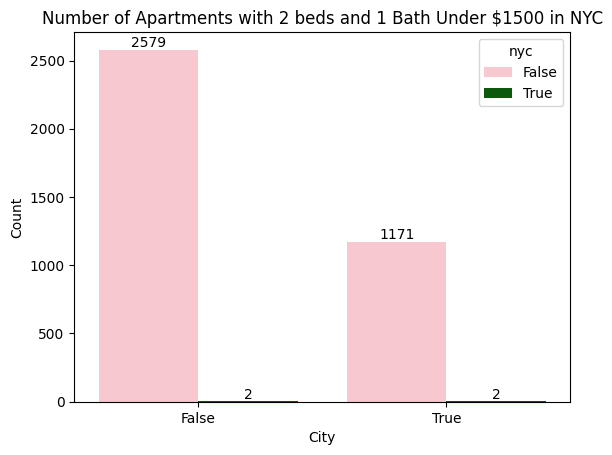

In [ ]:
color = ["pink", "darkgreen"]
ax =sns.countplot(apartments_clean, x="bedbath_", hue="nyc", palette= color)
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Number of Apartments with 2 beds and 1 Bath Under $1500 in NYC")
for container in ax.containers:
    ax.bar_label(container)
  #https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/
  #link for getting numbers above the bar
plt.show()


This graph shows that a little under 7000 apartments dont meet the criteria of 2 beds, 1 bath for a price under 1500 while under 3000 do meet this criteria. However , when the bars are pink that means the apartment is not in the NYC area. The green bars are the NYC apartments which have very small values. An issue with this data is that there's not a lot of data for apartments in NYC and it's possible some were missed due to labeling in the dataset. For example, I originally only looked up "New York" for city name and I got 3 results. Then when I looked up cities by borough, I got more results, but Queens, Staten Island and The Bronx all had 0 results. So the sample size is quite small for a big city. However, there were some helpful things this graph showed. There are apartments in NYC that meet the criteria which is what we wanted to find and since it's not a large number at 5, these apartments can be considered seriously, as there's not an overwhelming amount of options.


#2.4. Question 4

**Question 4: Is there easy access to "affordable" housing in NYC? What neighborhoods/where should we direct new homeowners to?**

In [ ]:
# Loading in the NYC shapefile

apartmap = gpd.read_file("/content/Shapefiles and base map.zip")
apartmap.head(1)

,bbl,bin,built_code,cnstrct_yr,doitt_id,feat_code,groundelev,heightroof,date_lstmo,time_lstmo,lststatype,name,num_floors,shape_area,shape_len,sub_code,geometry
0,4155980564,4462384.0,None,2001.0,939203.0,2100.0,6.0,26.528549,2005-05-31,00:00:00.000,Constructed,None,2.0,1768.567205,169.940373,210000.0,"POLYGON ((-73.74251 40.59909, -73.74259 40.599..."


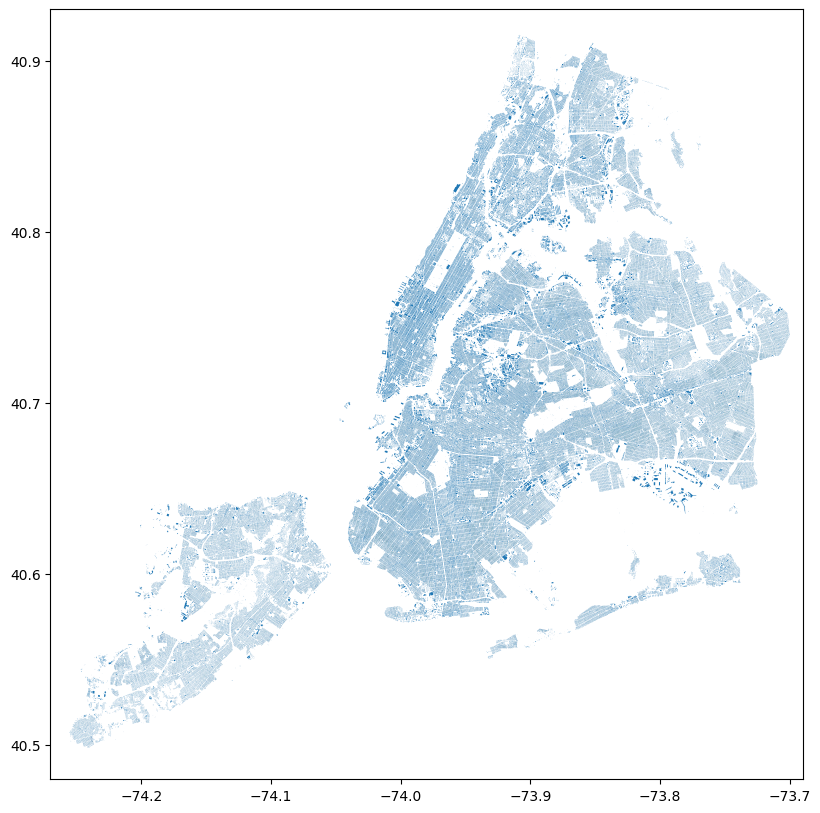

In [ ]:
# Plotting the shapefile to make sure it works
# It took a long to time perfectly adjust to fit the map space

xmin, ymin, xmax, ymax = -74.27, 40.48, -73.69, 40.93
fig, ax = plt.subplots(figsize=(15,10))
apartmap.plot(ax=ax)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
plt.show()

In [ ]:
# Creating a geo-dataframe variable for apartments_ny, which has all houses under $1,100 in NY

apartments_ny_gdf = gpd.GeoDataFrame(apartments_ny, geometry=gpd.points_from_xy(apartments_ny.longitude, apartments_ny.latitude))

In [ ]:
# Checking the crs of the shapefile

apartmap.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Matching the apartments_ny crs to the shapefile crs

apartments_ny_gdf.set_crs(epsg=4326,inplace=True)

,amenities,bathrooms,bedrooms,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,affordable,geometry
751,"Clubhouse,Dishwasher,Elevator,Patio/Deck,Refri...",1.0,1.0,"Cats,Dogs",1040,468,Rochester,NY,43.1689,-77.6289,RentLingo,True,POINT (-77.6289 43.1689)
1178,"Cable or Satellite,Dishwasher,Parking,Patio/De...",1.0,1.0,"Cats,Dogs",915,525,Buffalo,NY,42.9112,-78.8171,RentLingo,True,POINT (-78.8171 42.9112)
3254,"Cable or Satellite,Clubhouse,Dishwasher,Intern...",1.0,2.0,"Cats,Dogs",1598,696,Brockport,NY,43.2129,-77.9260,RentLingo,False,POINT (-77.926 43.2129)
3654,"Cable or Satellite,Dishwasher,Garbage Disposal...",1.0,1.0,"Cats,Dogs",1099,716,Rochester,NY,43.1689,-77.6289,RentLingo,True,POINT (-77.6289 43.1689)
3661,"Dishwasher,Elevator,Parking,Refrigerator",1.0,1.0,"Cats,Dogs",2300,717,Yonkers,NY,40.9392,-73.8727,RentLingo,False,POINT (-73.8727 40.9392)
3853,"Cable or Satellite,Elevator,Parking,Refrigerat...",1.0,1.0,"Cats,Dogs",795,727,Buffalo,NY,42.9112,-78.8171,RentLingo,True,POINT (-78.8171 42.9112)
3906,Dishwasher,1.0,1.0,"Cats,Dogs",2264,732,Port Chester,NY,41.0155,-73.6756,RentLingo,False,POINT (-73.6756 41.0155)
4308,"Cable or Satellite,Dishwasher,Elevator,Interne...",1.0,1.0,"Cats,Dogs",2600,755,Yonkers,NY,40.9392,-73.8727,RentLingo,False,POINT (-73.8727 40.9392)
4638,"Dishwasher,Pool",1.0,1.0,"Cats,Dogs",2220,783,New Rochelle,NY,40.9180,-73.7837,RentLingo,False,POINT (-73.7837 40.918)
4910,"Cable or Satellite,Dishwasher,Parking,Refriger...",1.0,2.0,"Cats,Dogs",1025,800,Buffalo,NY,42.9112,-78.8171,RentLingo,True,POINT (-78.8171 42.9112)


In [ ]:
# Checking that the crs is correct post-change

apartments_ny_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

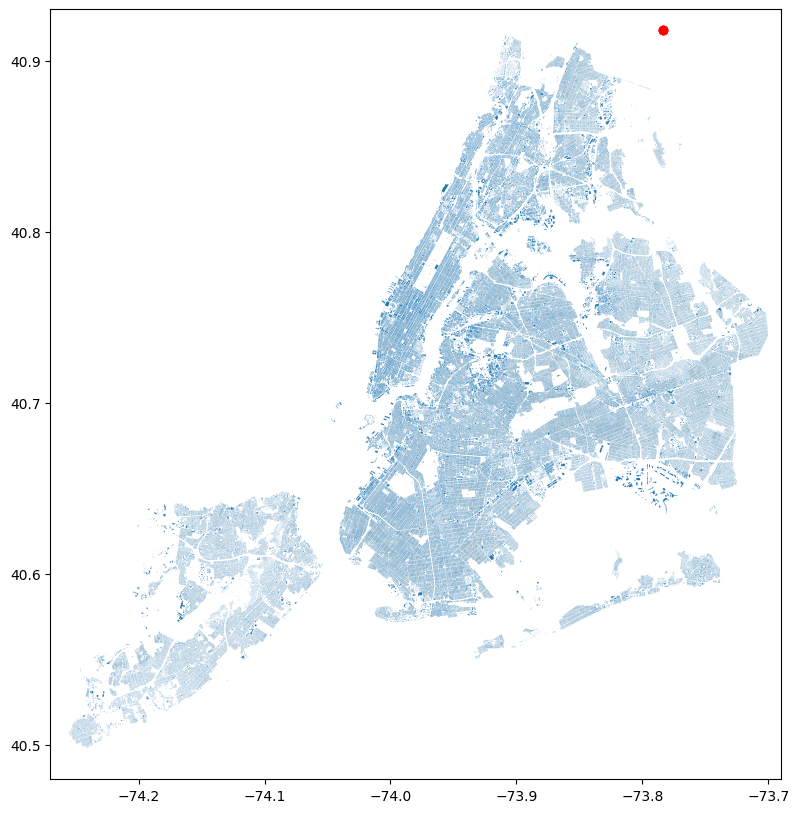

In [ ]:
# Overlaying the apartments dataframe onto the nyc shapefile
# The results show that there are 0 houses with prices < $1,100. This can be attributed to two things:

# 1) Our dataset is inadequate, and does not have accurate naming of variables or geometries, which can account for nothing appearing on the map (besides a red dot where White Plains is)
# When checking the naming conventions of the dataset, we can see that nyc buroughs are treated as distinct entities to New York as a whole, although there is only 4 Manhattan entries and nothing else.

# 2) Since we picked the 10k dataset instead of the 100k, there was likely a lot of data missing from our dataset. However, I find it hard to believe that every single nyc apartment wouldve
# been removed from the 100k when making the 10k dataset.

xmin, ymin, xmax, ymax = -74.27, 40.48, -73.69, 40.93
fig, ax = plt.subplots(figsize=(15,10))
apartmap.plot(ax=ax)
apartments_ny_gdf.plot(ax=ax, color='red')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
plt.show()

# 2.5. Question 5

Question 5: Can it be determined if prices are affected by owning pets? How much of an effect does owning a pet have on affordable housing?

In [ ]:
#I started by importing all of the libraries I thought I might need to create my model
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import geopandas as gpd

import statsmodels.api as sm

In [ ]:
#I then added another spot to load in our dataset because I didn't want to scroll back to the top
#of our notebook everytime I wanted to run it

apartments10k = pd.read_csv ("/content/apartments_for_rent_classified_10K.csv", encoding="latin1", sep=";")
apartments10k.head(1)

dead_columns = ["id", "category", "title", "body", "price_type", "price_display", "currency", "fee", "has_photo", "address", "time"]
apartments_clean = apartments10k.drop(columns = dead_columns)
apartments_clean.head(10)

,amenities,bathrooms,bedrooms,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source
0,NaN,NaN,0.0,NaN,790,101,Washington,DC,38.9057,-76.9861,RentLingo
1,NaN,NaN,1.0,NaN,425,106,Evansville,IN,37.9680,-87.6621,RentLingo
2,NaN,1.0,0.0,NaN,1390,107,Arlington,VA,38.8910,-77.0816,RentLingo
3,NaN,1.0,0.0,NaN,925,116,Seattle,WA,47.6160,-122.3275,RentLingo
4,NaN,NaN,0.0,NaN,880,125,Arlington,VA,38.8738,-77.1055,RentLingo
5,"Dishwasher,Elevator,Patio/Deck,Pool,Storage",1.0,0.0,NaN,2475,130,Manhattan,NY,40.7629,-73.9885,Listanza
6,NaN,NaN,0.0,NaN,1800,132,Venice,CA,33.9932,-118.4609,RentLingo
7,NaN,NaN,0.0,NaN,840,136,Washington,DC,38.9328,-77.0297,RentLingo
8,Refrigerator,1.0,0.0,NaN,1495,138,San Francisco,CA,37.7599,-122.4379,RentLingo
9,NaN,NaN,0.0,NaN,890,141,Washington,DC,38.9118,-77.0132,RentLingo


In [ ]:
# On the dataset, there were columns that indicated that there were no pets allowed which were labeled simply as 'Not_allowed', however, it was hard to
#isolate these columns because they were indicated as NaN values in google collab. So I used fillna to properly label these values as
#Not_allowed so I can indicate this variable in the dataset
apartments_clean["pets_allowed"] = apartments_clean["pets_allowed"].fillna('Not_allowed')
#Here using the .unique() function I'm checking to make the category is properly labeled
apartments_clean["pets_allowed"].unique()

array(['Not_allowed', 'Cats,Dogs', 'Cats', 'Dogs'], dtype=object)

In [ ]:
#Since another question in the notebook determined that an affordable house for low-income housing
# is 1100$, I used this to set my price for affordable housing since I'm answering a similar question
# about affordable housing

#I filtered out places in NY since our theme is covering affordability in NY at or below 1100,
# which cut down the rows in my dataset immensley

apartments_clean["affordable_housing"]=apartments_clean["price"] <= 1100
apartments_clean["pets_allowed"].unique()
apartments_ca = apartments_clean[apartments_clean['state'] == "NY"]
apartments_ca = apartments_ca.dropna()

apartments_ca

,amenities,bathrooms,bedrooms,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,affordable_housing
5,"Dishwasher,Elevator,Patio/Deck,Pool,Storage",1.0,0.0,Not_allowed,2475,130,Manhattan,NY,40.7629,-73.9885,Listanza,False
212,"Cable or Satellite,Elevator,Internet Access,Pa...",1.0,2.0,Not_allowed,1425,300,Brooklyn,NY,40.6496,-73.9596,RentLingo,False
394,"Elevator,Refrigerator",1.0,0.0,Not_allowed,1599,400,Briarwood,NY,40.6997,-73.8103,RentLingo,False
683,"Cable or Satellite,Parking,Refrigerator",1.0,1.0,Not_allowed,725,450,Buffalo,NY,42.9112,-78.8171,RentLingo,True
751,"Clubhouse,Dishwasher,Elevator,Patio/Deck,Refri...",1.0,1.0,"Cats,Dogs",1040,468,Rochester,NY,43.1689,-77.6289,RentLingo,True
812,Internet Access,1.0,0.0,Not_allowed,2650,480,Manhattan,NY,40.7457,-73.9814,RealRentals,False
919,"Dishwasher,Pool",1.0,0.0,Not_allowed,1635,500,New Rochelle,NY,40.9180,-73.7837,RentLingo,False
920,Refrigerator,1.0,1.0,Not_allowed,1600,500,Ridgewood,NY,40.7029,-73.8797,ListedBuy,False
1178,"Cable or Satellite,Dishwasher,Parking,Patio/De...",1.0,1.0,"Cats,Dogs",915,525,Buffalo,NY,42.9112,-78.8171,RentLingo,True
1945,"Parking,Refrigerator",1.0,1.0,Not_allowed,725,600,Buffalo,NY,42.9112,-78.8171,RentLingo,True


In [ ]:
#after using the unique function again, the category dogs was removed which can indicate that there weren't
#apartments listed in NY that were exclusivley dog friendly, but there still remains apartments that
#allow cats and dogs
apartments_ca["pets_allowed"].unique()

array(['Not_allowed', 'Cats,Dogs', 'Cats'], dtype=object)

In [ ]:
#I decided to drop amenities, citynames, state, latitude, longitude and source because these columns
#were not needed in my model. Additionally, I attempted to add in amenities as an X variable, however,
#this made the model not appear so I think there were too many categories for the model to handle

#I set my Cats,Dogs and Not allowed variables to dummy variables because these set these categorical variables to
#yes or no essentially, and make it easy to determine if these apartments do or don't allow pets
X=apartments_ca[["bathrooms", "bedrooms", "pets_allowed", "square_feet"]]
X = pd.get_dummies(X, drop_first=True).astype("float32")
X.head(5)

,bathrooms,bedrooms,square_feet,"pets_allowed_Cats,Dogs",pets_allowed_Not_allowed
5,1.0,0.0,130.0,0.0,1.0
212,1.0,2.0,300.0,0.0,1.0
394,1.0,0.0,400.0,0.0,1.0
683,1.0,1.0,450.0,0.0,1.0
751,1.0,1.0,468.0,1.0,0.0


In [ ]:
#These are my rows that remained after I cleaned the dataset for State for NY and Price for 1100$

y=(apartments_ca["affordable_housing"]==1).astype("float")
y.value_counts()
y

,affordable_housing
5,0.0
212,0.0
394,0.0
683,1.0
751,1.0
812,0.0
919,0.0
920,0.0
1178,1.0
1945,1.0


In [ ]:
X = sm.tools.tools.add_constant(X)

model = sm.Logit(y, X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.626457
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:     affordable_housing   No. Observations:                   39
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            5
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                 0.05977
Time:                        21:36:32   Log-Likelihood:                -24.432
converged:                       True   LL-Null:                       -25.985
Covariance Type:            nonrobust   LLR p-value:                    0.6836
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.0991      2.134      0.515      0.607      -3.084

Our coefficent for Cats and Dogs is -0.6345 so this means the chance of finding an affordable house with a Dog or cat would decrease by .06345 percent. The p value of Dogs and Cats is 0.683 and this indactes that this Dog and Cats don't have a significant impact on affordable housing. If we look at the Not allowed variable, we will see that there is a coefficient of -0.7414. The Not allowed p value is 0.648 percent. Our Pseudo R-squ tells us we have 0.05977, which means it's telling us our model has a 5% varability of fitting the model. This is not great.

In [ ]:
#model evaluation
phat = model.predict()

phat[0:10]

array([0.19067572, 0.38527482, 0.22375426, 0.31413367, 0.34061475,
       0.23430569, 0.23699685, 0.32223677, 0.35024242, 0.33876426])

In [ ]:
model.pred_table(threshold=0.5)

array([[21.,  3.],
       [11.,  4.]])

In [ ]:
#It seems that this model has an accuracy of 64%

confusion = model.pred_table(threshold=0.5)

confusion.trace()/confusion.sum()*100

64.1025641025641

In [ ]:
#This has an accuracy of 61%

y.value_counts(normalize=True)

,proportion
affordable_housing,
0.0,0.615385
1.0,0.384615


# 3. Conclusions

Question 1 analyzed how accurately we can determine price from square footage, and whether a significant correlation existed. The analysis was partly effective in showing how different factors relate to apartment prices but has some clear limitations. Square footage was found to significantly impact price, with each extra square foot adding about $0.64.
The R-squared value of 15.3% means square footage only explains a small part of the price difference. This suggests other factors, like location, amenities, and property condition, play a big role. Looking at the regression plot, prices generally increased with square footage, but there was a lot of variation, including clusters and outliers, showing that some prices are influenced by things other than size. Focusing on a smaller range of square footage and price improved the models accuracy but showed that square footage alone is not enough to predict prices well. The second model tested whether the number of bedrooms or bathrooms better predicted price. Bathrooms had a meaningful effect, with each additional bathroom increasing price by about $551.
Bedrooms, on the other hand, had little to no effect. However, this models R-squared value of 12.3% was even lower, suggesting square footage is a slightly better predictor overall. Therefore, clients should not look at one specific indicator when trying to establish a general price for a home, and must be aware that a number of factors influence price, and there is no sole primary indicator. Clients on a house hunt should not skim through options by looking at square footage or bathrooms, and instead should take the time to evaluate each home.

The results for Question 2 show that rental properties can indeed be accurately classified as “affordable” or “unaffordable” for low-income households based on the set price thresholds and property attributes. Using $1,100 as the affordability threshold, the random forest model achieved perfect accuracy on both the training and test datasets, and there was no significant overfitting based on the test results. Key findings include the high Gini importance of price (0.256015), highlighting its central role in determining affordability. However, since the filtered dataset only includes properties in New York State, this may reduce the applicability of the model to a wider context. Future work may involve expanding the dataset to include properties from different regions, improving its generalizability and reducing the risk of overfitting observed in smaller samples.

Question 3 showed how many apartments there are in the NYC area at an affordable cost with reasonable conditions. According to the graph, 5 out of 16 apartments from the datset in NYC had 2 bedrooms and 1 bathroom for a cost under $1500. These results can help our clients be more efficient in their apartment hunting process by knowing the exact number of apartments in their desired area that have what they want for the price they want. The analysis was effective in the sense that we got an exact number of apartments for our clients to choose from. A way to make this more advanced would to be to have more apartments a part of the search. This can be achieved by either looking at more than one area or focusing on an area with more than 16 apartments. Then, we could also add more parameters or more desired amenities. This would allow for a more in depth analysis and would widen our clients options.

The results for Question 4 showed that there was no "affordable" housing located in New York City. There was a possibility that picking the 10k entry instead of the 100k entry dataset skewed the answer to this question significantly, as the dataset given to use was almost completely missing any data for NYC. The existing data for NYC was incorrectly labelled under buroughs, only had 4-6 apartments between Brooklyn and Manhattan, and had incorrect geometry data that did not allow the points to show on the graph (wrong longitudes and latitutdes). Despite the errors caused by the dataset, it is unlikely that we would have found any apartments for rent at $1,100 per month or under, as NYC rent is ever-increasing and at a rapid rate where no houses would ever be considered "affordable" as the U.S. Department of Housing and Urban Development defines it. Using a shapefile for all of New York State would have helped, though it would still only have a dozen or so apartments.

Question 5 showed that none of the variables in the dataset were statistically significant to determine if having a pet affects the affordability for an apartment. This may have resulted from the lack of data on nyc apartments there was in the dataset. I set my affordable_housing variable to 1100$ to account for affordable housing in NYC. The output for my model was affordable_housing. According to the regression model, the Cats and Dogs category as well as the Not allowed category's coefficents were both negative, -0.6345 and -0.7414, so that means they both contribute to making it harder to fins an affordable house in the city. The regression model has a 64% accuracy rate, and this may have resulted from the low amount of data there was to train the model. Based on the model and the coefficents of the pet categories, having pets leads to less affordable housing. My model shows that 1 is affordable and 0 is not affordable, since the coefficent with pets is negative, it causes the model to lean towards not affordable. There are other variables coefficents that are positive, such as bedrooms with 0.4257, so these variables contribute to housing being more affordable. The amount of data avaliable for NYC apartments was too small to the point where I didn't have a lot of training data which is a large reason why my variables were statistically insignificant, and this resulted in a weak model.